<a href="https://colab.research.google.com/github/vijaygwu/posts/blob/main/Log_Log_Demand_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

This script demonstrates a log-log model for economic demand analysis. Here's a breakdown of what the code does:

We generate synthetic data for price, income, and quantity, based on a theoretical demand function.
We create a pandas DataFrame with this data.
We fit a log-log model using the formula

> *np.log(Quantity) ~ np.log(Price) + np.log(Income)*


We print the model summary, which includes statistics like R-squared and p-values.
We calculate predicted quantities using the fitted model.
We create two plots:


1. Income vs Quantity: Shows how quantity demanded changes with income.
2. Price vs Quantity: Shows how quantity demanded changes with price.


Finally, we print the price elasticity of demand and income elasticity of demand.

**Key economic concepts demonstrated:**

Price Elasticity of Demand: This is the coefficient of log(Price) in our model. It represents the percentage change in quantity demanded for a 1% change in price, holding other factors constant.
Income Elasticity of Demand: This is the coefficient of log(Income) in our model. It represents the percentage change in quantity demanded for a 1% change in income, holding other factors constant.
Demand Function: We've modeled a demand function that depends on both price and income, which is a common approach in economic analysis

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4736.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.93e-97
Time:                        21:24:35   Log-Likelihood:                 91.158
No. Observations:                 100   AIC:                            -176.3
Df Residuals:                      97   BIC:                            -168.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.6264      0.184     36.

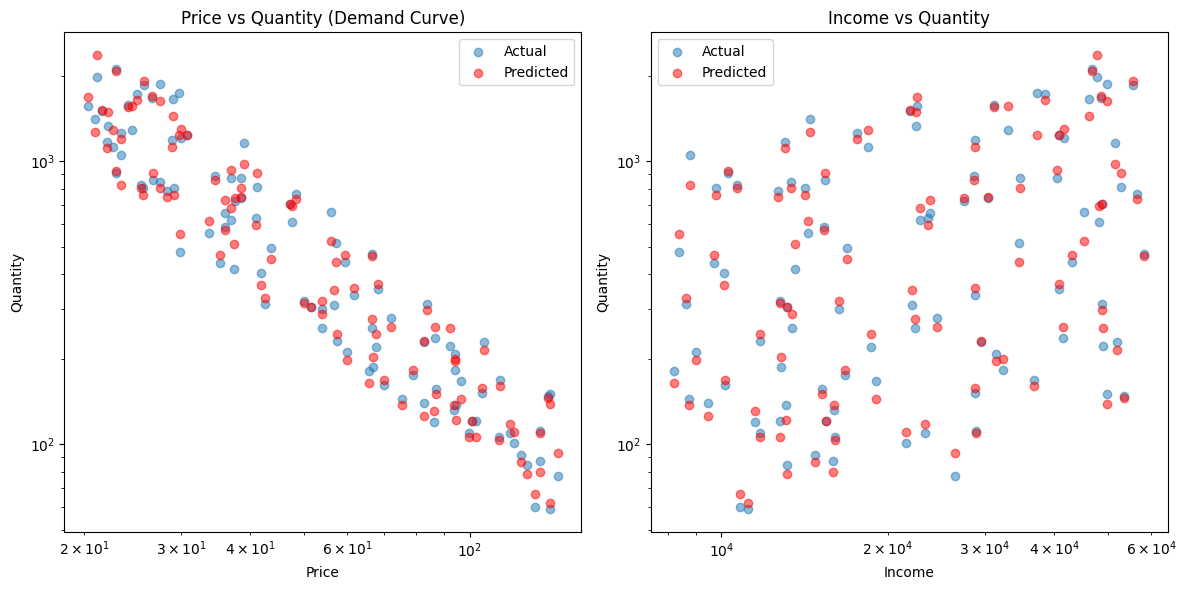

Price Elasticity of Demand: -1.5171
Income Elasticity of Demand: 0.5360


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 100

# Generate sample data
# Price: Using exp(uniform) to create a right-skewed distribution, typical for price data
price = np.exp(np.random.uniform(3, 5, n))  # Price between ~$20 and ~$150

# Income: Also right-skewed, representing a typical income distribution
income = np.exp(np.random.uniform(9, 11, n))  # Income between ~$8000 and ~$60000

# Demand function: Q = k * P^a * I^b * e
# where:
#   Q is quantity demanded
#   P is price
#   I is income
#   a is price elasticity of demand (expected to be negative)
#   b is income elasticity of demand (usually positive for normal goods)
#   k is a scaling constant
#   e is a random error term (representing other factors affecting demand)

k = 1000  # Scaling constant
a = -1.5  # Price elasticity (negative, as demand usually decreases when price increases)
b = 0.5   # Income elasticity (positive, assuming a normal good)
error = np.random.normal(0, 0.1, n)  # Random error term

# Calculate quantity based on our demand function
quantity = k * price**a * income**b * np.exp(error)

# Create a pandas DataFrame to hold our data
data = pd.DataFrame({
    'Quantity': quantity,
    'Price': price,
    'Income': income
})

# Fit the log-log model
# We use logarithms to transform the multiplicative relationship into an additive one
model = ols('np.log(Quantity) ~ np.log(Price) + np.log(Income)', data=data).fit()

# Print the model summary
print(model.summary())

# Calculate predicted values
# We need to exponentiate because our model predicts log(Quantity)
data['Predicted_Quantity'] = np.exp(model.predict(data))

# Plotting
plt.figure(figsize=(12, 6))

# Price vs Quantity plot
plt.subplot(121)
plt.scatter(data['Price'], data['Quantity'], alpha=0.5, label='Actual')
plt.scatter(data['Price'], data['Predicted_Quantity'], color='red', alpha=0.5, label='Predicted')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity (Demand Curve)')
plt.legend()

# Income vs Quantity plot
plt.subplot(122)
plt.scatter(data['Income'], data['Quantity'], alpha=0.5, label='Actual')
plt.scatter(data['Income'], data['Predicted_Quantity'], color='red', alpha=0.5, label='Predicted')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Income')
plt.ylabel('Quantity')
plt.title('Income vs Quantity')
plt.legend()

plt.tight_layout()
plt.show()

# Print elasticities
# In a log-log model, coefficients directly represent elasticities
print(f"Price Elasticity of Demand: {model.params['np.log(Price)']:.4f}")
print(f"Income Elasticity of Demand: {model.params['np.log(Income)']:.4f}")

# Interpreting the results:
# Price Elasticity: If negative, it indicates that as price increases, quantity demanded decreases.
#                   The magnitude tells us how responsive demand is to price changes.
# Income Elasticity: If positive, it indicates a normal good (demand increases with income).
#                    If negative, it would indicate an inferior good.